In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [8]:
fd= pd.read_csv("multiple_linear_regression.csv")

In [9]:
fd.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
fd.isnull().any()

Feature 1    False
Feature 2    False
Feature 3    False
Target       False
dtype: bool

# Splitting Data

In [21]:
x = fd.iloc[ : , fd.columns != "Target"]

In [16]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
y = fd.loc[ : , "Target" ]

y

In [52]:
x_train,x_test,y_train,y_test = train_test_split( x,y , train_size = 0.3,random_state = 43)

In [53]:
x_train.shape

(60, 3)

In [54]:
x_test.shape

(140, 3)

In [55]:
y_train.shape

(60,)

## Training the Model

In [56]:
lr_model = LinearRegression()

In [57]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [58]:
lr_model.coef_

array([ 0.04104469,  0.19645191, -0.01350548])

In [59]:
lr_model.intercept_

4.099930986857787

In [61]:
y_pred = lr_model.predict(x_test)

# Cost

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
cost = mean_squared_error(y_test,y_pred)
cost

3.3300383152160253

## Prediction

## Visulaization

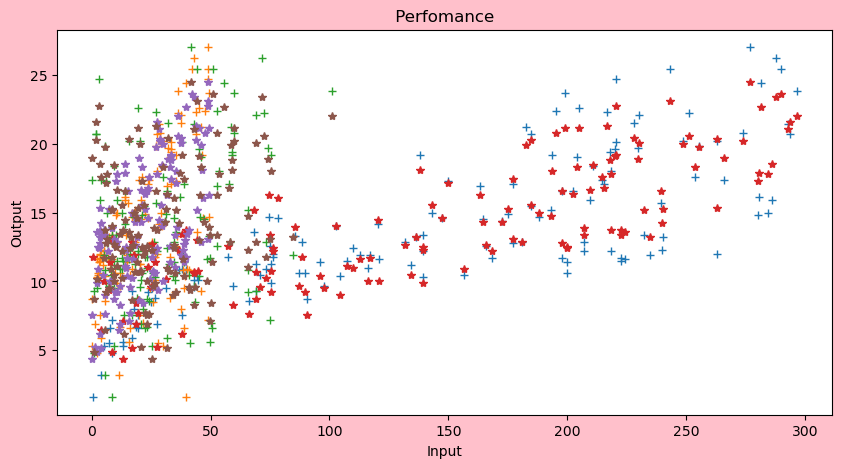

In [64]:
plt.figure(figsize = (10,5),facecolor = "pink")

plt.plot(x_test,y_test , " +")
plt.plot(x_test,y_pred , "*")
plt.xlabel("Input")
plt.ylabel("Output")

plt.title( " Perfomance ")
plt.show()

# Assumptions

In [65]:
residuals = y_test - y_pred

# Observing relation

In [66]:
residuals

56    -3.860729
37    -1.553494
67     0.871747
79     0.938182
80    -0.379839
         ...   
175    2.492824
191    0.660547
125    0.952631
6     -0.786245
147    2.290149
Name: Target, Length: 140, dtype: float64

In [67]:
y_test

56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
       ... 
175    27.0
191     9.9
125    10.6
6      11.8
147    25.4
Name: Target, Length: 140, dtype: float64

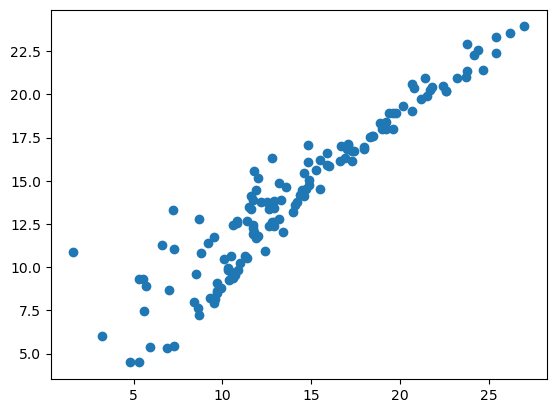

In [49]:
plt.scatter(y_test,y_pred)

C:\Users\raghu\AppData\Local\Temp\ipykernel_16896\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Target', ylabel='Density'>

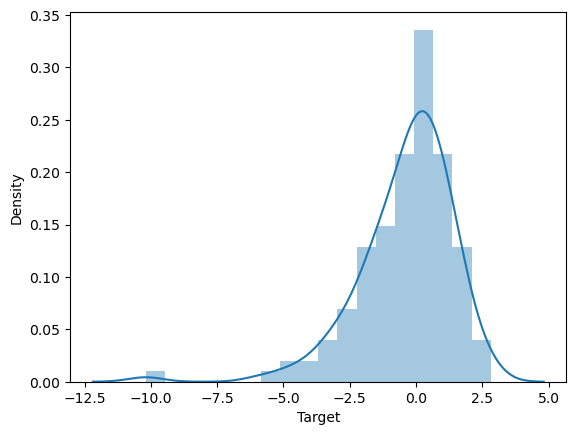

In [68]:
sns.distplot(residuals)